In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pickle
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

from tensorflow.keras.layers import Concatenate, Dense, Dropout
from tensorflow.keras.layers import Add, Activation, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from src.explore import explore_data, create_dis_rating, top_reviewers, top_products, sub_dataset
from src.cf_models import import_data, create_parameters_model, train_test, RecommenderNet

In [2]:
data = pd.read_csv('../data/data_2018_clean.csv')

In [18]:
# data structure
# data.head()

In [4]:
# explore the dataset of 2018 
explore_data()

Count of Reviewers: 119945
Count of Products: 38846

Ratings descriptive statistics: 
count    209060.000000
mean          4.336109
std           1.230864
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Reviewers by count descriptive statistics: 
count    119945.000000
mean          1.742966
std           2.365081
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         110.000000
Name: rating, dtype: float64

Products by count descriptive statistics: 
count    38846.000000
mean         5.381378
std         17.192630
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        959.000000
Name: rating, dtype: float64

Top reviwers by count of reviews: 
reviewerID
AJ2LH4FFW4QYX     110
A3QXT4RO4RBPCL     99
A5RGNTKP1A87U      98
A471W6ANJU6W9      86
A1ADJ8AD91RE0J     82
AG8OC1AEP44WU      82
A2764UZVBFC61W 

In [5]:
ratings_2018, top_reviewers, top_products = sub_dataset()

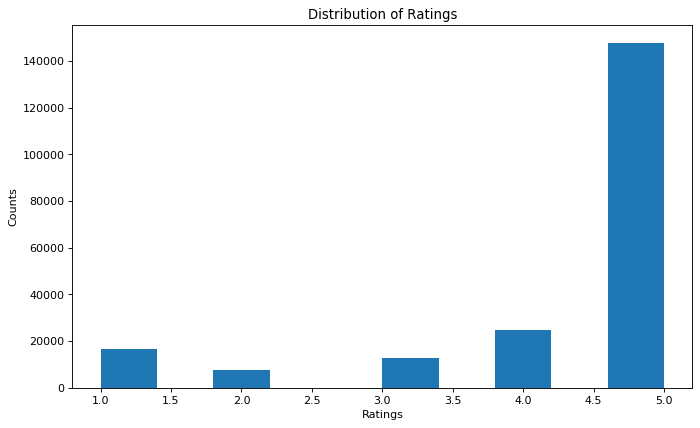

In [6]:
# distribution of ratings
rating_hist = create_dis_rating(ratings_2018)

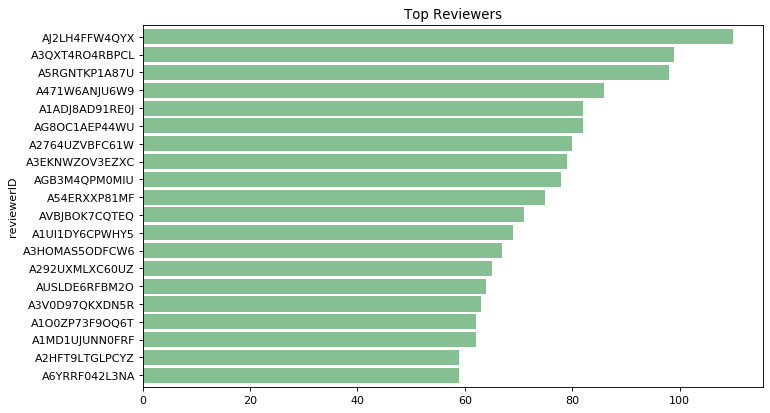

In [7]:
# top reviewers
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
top_reviewers.sort_values().plot(kind='barh',color='#86bf91', zorder=2, width=0.85)
plt.title('Top Reviewers')
    
plt.show()

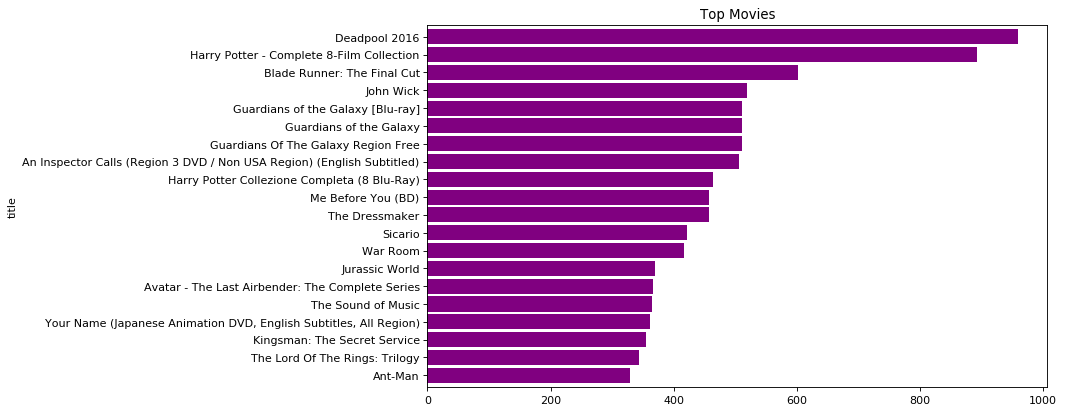

In [8]:
# top products
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

top_products.sort_values().plot(kind='barh', zorder=2, color='purple', width=0.85)
plt.title('Top Movies')

plt.show()

## Findings:

1. Majority ratings are 5.
2. 50% reviewers only reviewed 1 movie.
3. 25% movies have only one review. 
4. Data is sparse. 

In [16]:
# import cleaned data for model 
data_2018 = import_data()

In [11]:
# get parameters for the model
n_reviewers, n_movies, n_factors, min_rating, max_rating = create_parameters_model(data_2018)

In [12]:
# split train and test data for the model
X_train_array, X_test_array, y_train, y_test = train_test(data_2018)

In [14]:
# initialate the model
model = RecommenderNet(n_reviewers, n_movies, n_factors, min_rating, max_rating)

In [15]:
# fit the data
history = model.fit(x=X_train_array, 
                    y=y_train, 
                    batch_size=64, 
                    epochs=5,
                    verbose=1, 
                    validation_data=(X_test_array, y_test))

Train on 93360 samples, validate on 23340 samples
Epoch 1/5


/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


93360/93360 [==============================] - 29s 313us/sample - loss: 1.2486 - mae: 0.7633 - val_loss: 0.9015 - val_mae: 0.5163
Epoch 2/5
93360/93360 [==============================] - 28s 302us/sample - loss: 0.7150 - mae: 0.4506 - val_loss: 0.8794 - val_mae: 0.4986
Epoch 3/5
93360/93360 [==============================] - 30s 324us/sample - loss: 0.6098 - mae: 0.3913 - val_loss: 0.8912 - val_mae: 0.4930
Epoch 4/5
93360/93360 [==============================] - 29s 313us/sample - loss: 0.5538 - mae: 0.3663 - val_loss: 0.8828 - val_mae: 0.4861
Epoch 5/5
93360/93360 [==============================] - 27s 292us/sample - loss: 0.5130 - mae: 0.3506 - val_loss: 0.8876 - val_mae: 0.4872


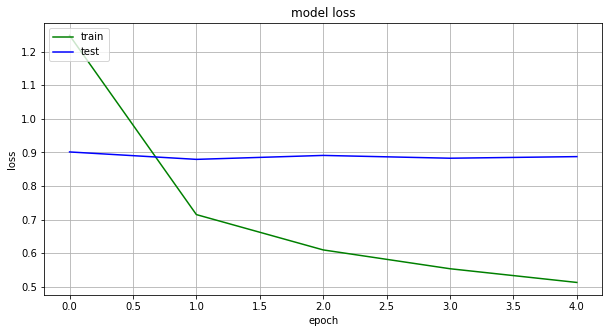

In [17]:
# visualize the loss
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , 'g')
plt.plot(history.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [33]:
# load the recommeder
from src.recommend_movies import recommender

In [34]:
rec = recommender(1000)

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [35]:
rec

,movie,title,average_rating,category,description,price,links
19449,1162,Lean on Me,4.857143,"['Movies & TV', 'Studio Specials', 'Warner Hom...",['Based on the true story of new jersey high s...,$15.00,https://www.amazon.com/product-reviews/6305133...
20855,2499,The Family Man,5.000000,"['Movies & TV', 'Genre for Featured Categories...",NaN,$22.31,https://www.amazon.com/product-reviews/B000057...
34954,18583,Back to the Future 30th Anniversary Trilogy,4.586538,"['Movies & TV', 'Boxed Sets', 'Comedy']",['Experience the future all over again with th...,$22.51,https://www.amazon.com/product-reviews/B011Q0F...
60138,4300,Evelyn,4.833333,"['Movies & TV', 'Studio Specials', 'MGM Home E...","[""From the director of Driving Miss Daisy come...",$16.67,https://www.amazon.com/product-reviews/B00008D...
85188,15127,Futurama: The Complete Series,4.383333,"['Movies & TV', 'Studio Specials', '20th Centu...",['As vast and hilarious as the universe itself...,$68.45,https://www.amazon.com/product-reviews/B00F77M...
